In [2]:
import scipy.stats
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from flowjax.distributions import LogNormal
import jax.random as jr

In [2]:
#old
priors1 = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}

In [22]:
dist1 = scipy.stats.lognorm(s=0.5, loc=1e-8, scale=5.0e-9)
x = dist1.rvs(10000)
dist2 = scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
y = dist2.rvs(10000)

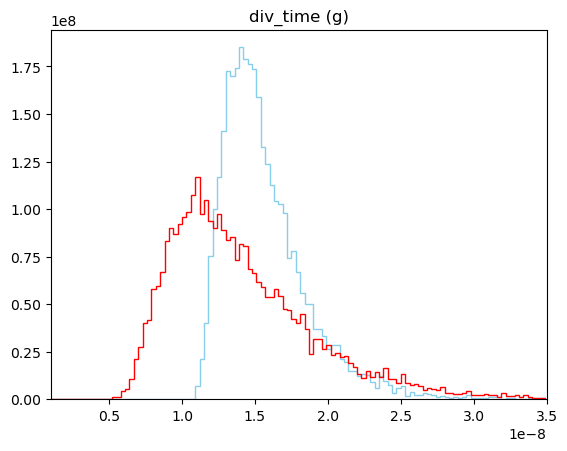

In [23]:
import matplotlib.pyplot as plt
plt.hist(x, bins=np.arange(0.1e-8, 3.5e-8, 3e-10), color = "skyblue", ec="skyblue",density=True, histtype='step')
plt.hist(y, bins=np.arange(0.1e-8, 3.5e-8, 3e-10), color = "red", ec="red",density=True, histtype='step')
plt.xlim([0.1e-8, 3.5e-8])
plt.title("div_time (g)")
plt.show()

In [6]:
theta1 = []
for key, prior in priors_3.items():
    theta1.append(prior.rvs(10000))
theta1 = np.concatenate(theta1, axis=0)
print(np.shape(theta1))
theta1 = np.reshape(theta1, (16,10000))
print(np.shape(theta1))

(160000,)
(16, 10000)


In [ ]:
#sample from flowjax dist
key, subkey = jr.split(jr.PRNGKey(2))
theta2 = []
for key, prior in priors2.items():
    theta2.append(prior.sample(subkey,(10000,)))
theta2 = np.concatenate(theta2, axis=0)
print(np.shape(theta2))
theta2 = np.reshape(theta2, (16,10000))
print(np.shape(theta2))

AttributeError: 'rv_continuous_frozen' object has no attribute 'sample'

In [6]:
lims = [[0, 100],
        [0, 500000],
        [500, 11000],
        [1000, 6000],
        [0, 0.4],
        [0, 0.3],
        [0, 80],
        [0, 500],
        [0, 500000],
        [0, 100000],
        [0, 750000],
        [0, 20000],
        [0, 100000],
        [0, 300000],
        [0, 1e-7],
        [0.5e-8, 3.5e-8]]

bins = [[120,100],
        [400,300],
        [100,100],
        [100,100],
        [100,500],
        [100,500],
        [200,100],
        [100,100],
        [300,400],
        [500,600],
        [400,1000],
        [500,600],
        [500,600],
        [300,400],
        [200,300],
        [100,200]]

names = ["captive_time",
        "div_time",
        "div_time_dom",
        "div_time_scot",
        "mig_rate_captive",
        "mig_rate_scot",
        "mig_length_scot",
        "pop_size_captive",
        "pop_size_domestic_1",
        "pop_size_lyb_1",
        "pop_size_lyb_2",
        "pop_size_scot_1",
        "pop_size_eu_1",
        "pop_size_eu_2",
        "mutation_rate",
        "recombination_rate"
        ]

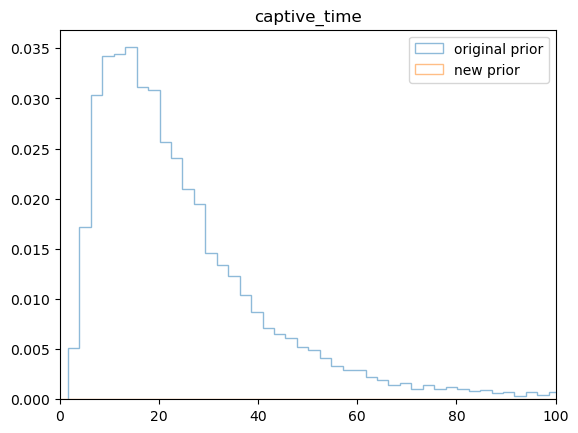

ValueError: supplied range of [0.0, inf] is not finite

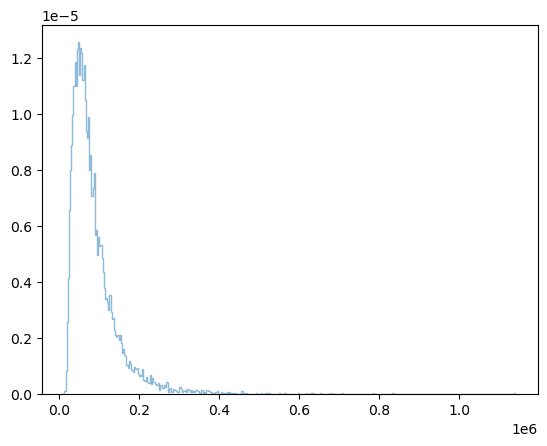

In [13]:
for num in range(0,16):  
    plt.hist(theta1[num][:],
             alpha=0.5,
             label='original prior', bins=bins[num][0], density=True, histtype='step')
    
    plt.hist(theta2[num][:],
             alpha=0.5,
             label='new prior', bins=bins[num][1], density=True, histtype='step')

    plt.legend(loc='upper right')
    plt.title(names[num])
    #plt.yticks([])
    plt.xlim(lims[num])
    plt.show()

In [ ]:
#new
priors_3 = {
    "bottleneck_strength_domestic": scipy.stats.truncnorm(a=-0.5, b=np.inf, loc=7500, scale=15000),
    "bottleneck_strength_wild": scipy.stats.truncnorm(a=-0.5, b=np.inf, loc=7500, scale=15000),
    "bottleneck_time_domestic": scipy.stats.truncnorm(a=-6, b=np.inf, loc=3500, scale=500),
    "bottleneck_time_wild": scipy.stats.truncnorm(a=-6, b=np.inf, loc=3500, scale=500),
    "captive_time": scipy.stats.lognorm(s=0.4, loc=1, scale=np.exp(2.7)),
    "div_time": scipy.stats.truncnorm(a=-7, b=np.inf, loc=40000, scale=4000),
    "mig_length_post_split": scipy.stats.uniform(loc=0, scale=10000),
    "mig_length_wild": scipy.stats.lognorm(s=0.4, loc=1, scale=np.exp(2.5)),
    "mig_rate_captive": scipy.stats.lognorm(s=0.5, loc=0, scale=0.08),
    "mig_rate_post_split": scipy.stats.truncnorm(a=0, b=5, loc=0, scale=0.2),
    "mig_rate_wild": scipy.stats.lognorm(s=0.5, loc=0, scale=0.08),
    "pop_size_wild_1": scipy.stats.lognorm(s=0.2, loc=30, scale=np.exp(8.7)),
    "pop_size_wild_2": scipy.stats.lognorm(s=0.2, loc=30, scale=np.exp(9)),
    "pop_size_captive": scipy.stats.lognorm(s=0.5, loc=10, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=0.25, loc=5, scale=np.exp(8.75)),
    "pop_size_domestic_2": scipy.stats.lognorm(s=0.2, loc=5, scale=np.exp(9.2))
}

In [17]:
lims2 = [[0, 100],
        [0, 500000],
        [500, 11000],
        [1000, 6000],
        [0, 0.4],
        [0, 0.3],
        [0, 80],
        [0, 500],
        [0, 500000],
        [0, 100000],
        [0, 750000],
        [0, 20000],
        [0, 100000],
        [0, 300000],
        [0, 1e-7],
        [0.5e-8, 3.5e-8]]

bins2 = [[50,100],
        [50,300],
        [50,100],
        [50,100],
        [50,500],
        [50,500],
        [50,100],
        [50,100],
        [50,400],
        [50,600],
        [50,1000],
        [50,600],
        [50,600],
        [50,400],
        [50,300],
        [50,200]]

names2 = ['bottleneck_strength_domestic', 
          'bottleneck_strength_wild', 
          'bottleneck_time_domestic', 
          'bottleneck_time_wild', 
          'captive_time', 
          'div_time', 
          'mig_length_post_split', 
          'mig_length_wild', 
          'mig_rate_captive', 
          'mig_rate_post_split', 
          'mig_rate_wild', 
          'pop_size_wild_1', 
          'pop_size_wild_2', 
          'pop_size_captive', 
          'pop_size_domestic_1', 
          'pop_size_domestic_2']

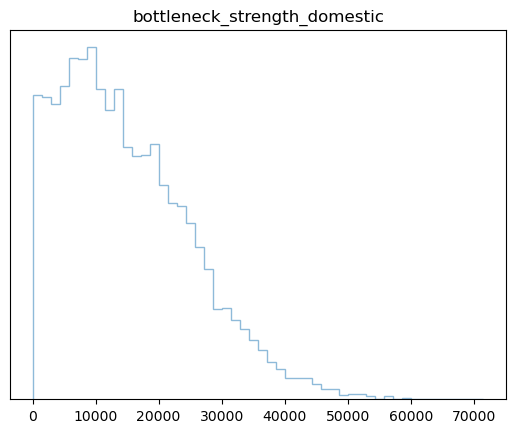

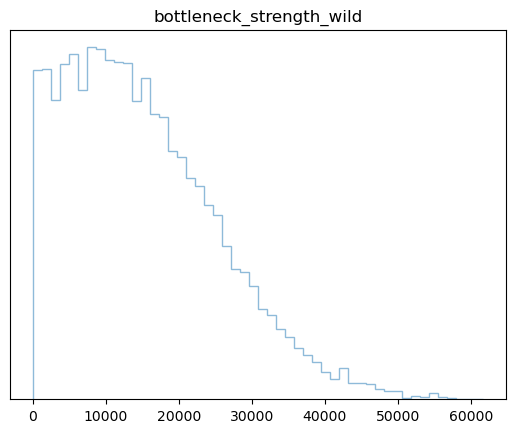

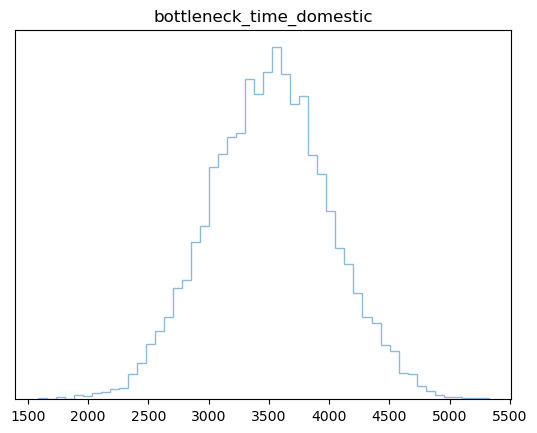

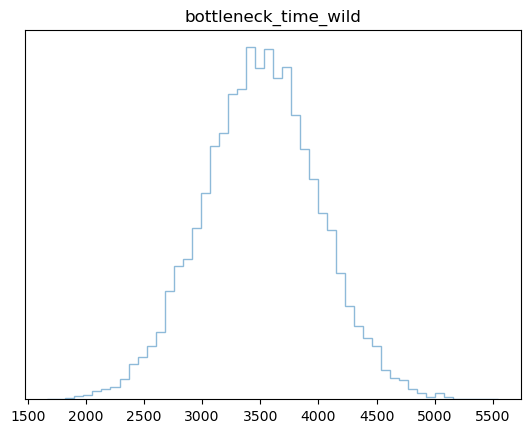

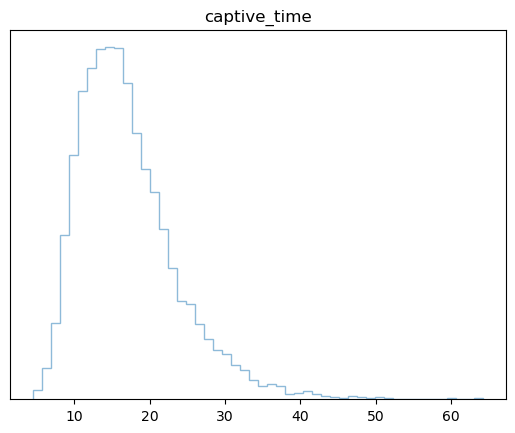

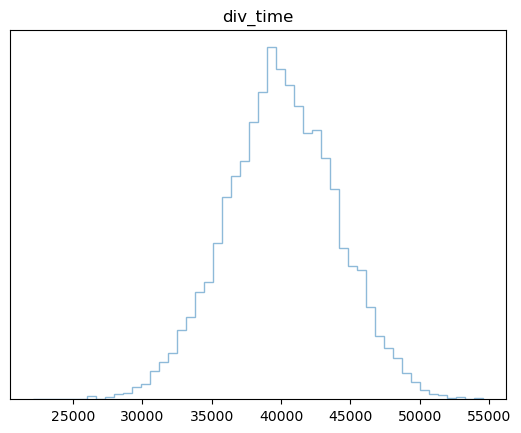

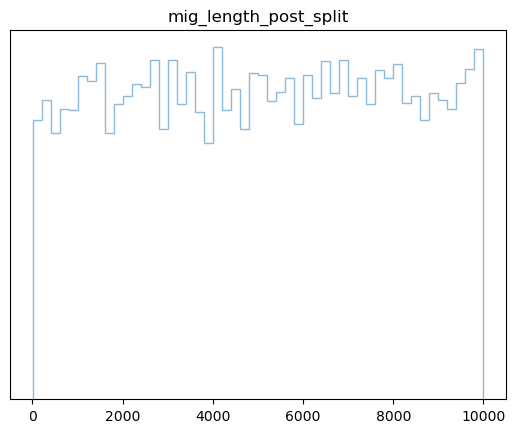

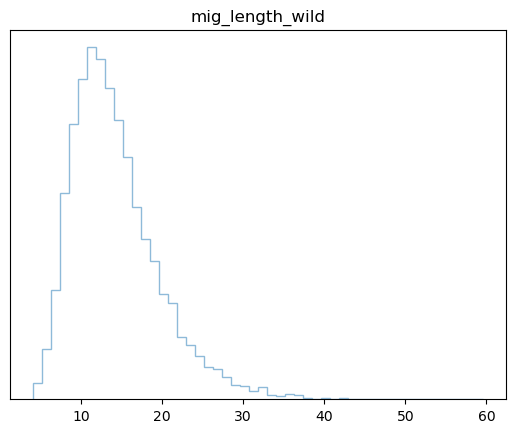

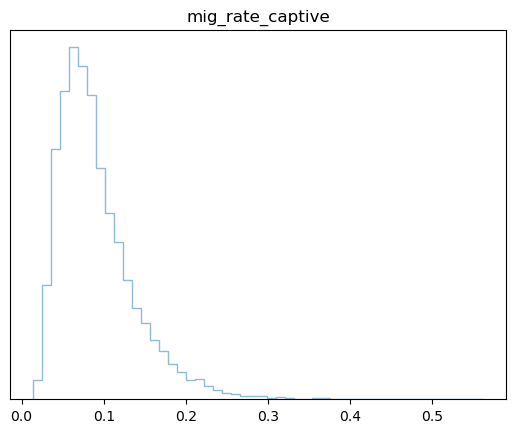

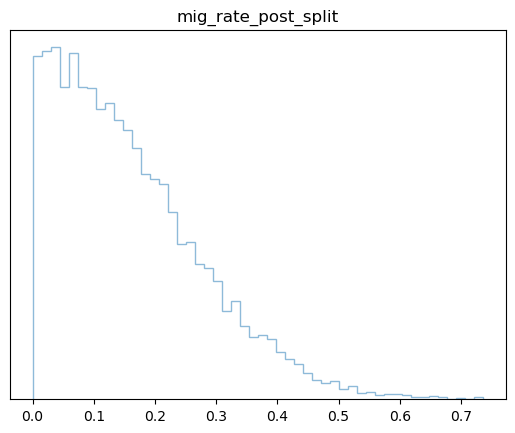

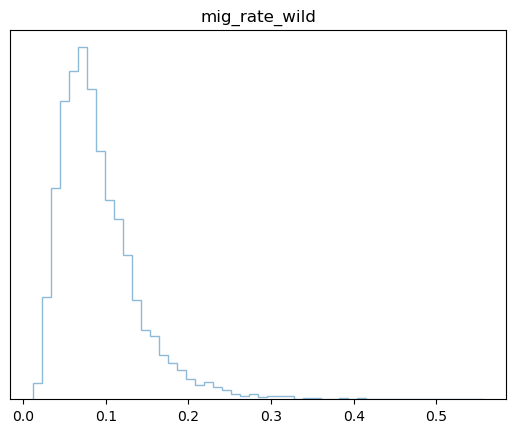

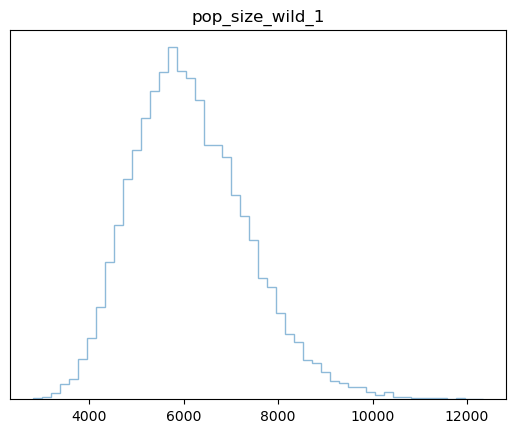

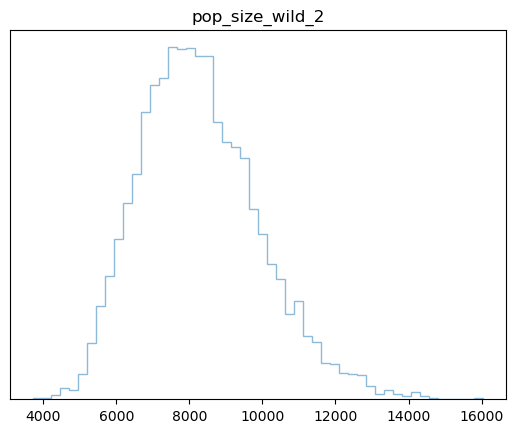

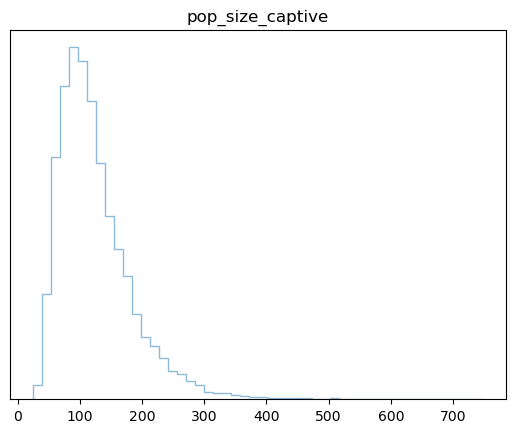

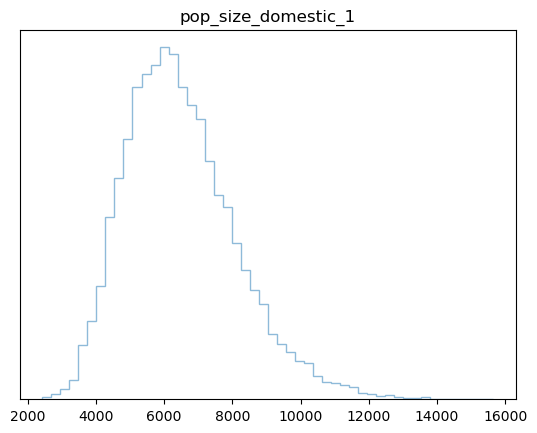

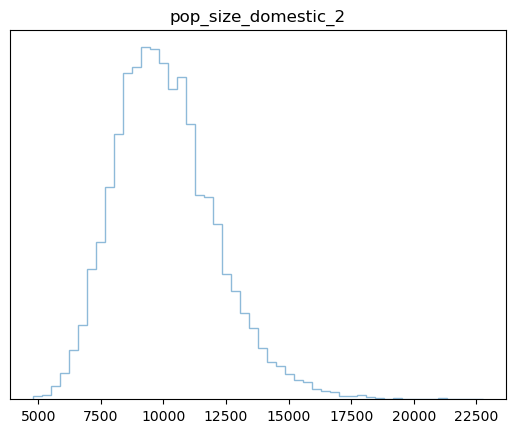

In [18]:
for num in range(0,16):  
    plt.hist(theta1[num][:],
             alpha=0.5,
             label='original prior', bins=bins2[num][0], density=True, histtype='step')

    plt.yticks([])
    plt.title(names2[num])
    plt.show()